In [59]:
!pip install scipy==1.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [138]:
from random import randint, random
from math import sqrt, cos,sin
import numpy as np
from scipy import stats
# create embeddings by different ways to get different distributions

# 1. isotrophic, uniformly distributed
def uniform_distributed_samples(nSamples=1000):
  samples = []
  for t in range(nSamples):
    x = (1-2*randint(0,1))*random()
    y = (1-2*randint(0,1))*sqrt(1.0001-x**2)
    samples.append([x,y])
  return np.asarray(samples)

# 2. isotrophic, with nClasses gaussian  Distribution
def gaussian_distributed_samples(nSamples=10000, nClasses=10, sigma=1.414):
  centers = [0+6.28/nClasses*i for i in range(nClasses)]
  samples = []
  for t in range(nSamples):
    # first choose a center by uniform distribution
    center = centers[randint(0, nClasses-1)]
    # then get the theta in polar coords by gaussian distribution
    theta = stats.norm.rvs(loc=center, scale=sigma)
    # then transfer to x-y coords
    x,y = cos(theta), sin(theta)
    samples.append([x,y])

  return np.asarray(samples)

# 3. anisotrophic, aggregate in the first quadrant
def anisotrophic_distributed_samples(nSamples=10000):
  samples = []
  center = 3.14/4 # pi/4
  for t in range(nSamples):
    # first choose a center by uniform distribution
    # then get the theta in polar coords by gaussian distribution
    theta = stats.norm.rvs(loc=center, scale=0.2)
    # then transfer to x-y coords
    x,y = cos(theta), sin(theta)
    samples.append([x,y])

  return np.asarray(samples)

In [154]:
nSamples=10000
# samples = uniform_distributed_samples(nSamples=nSamples)
samples = gaussian_distributed_samples(nSamples=nSamples,nClasses=3,sigma=0.2)
# samples = anisotrophic_distributed_samples(nSamples=nSamples)

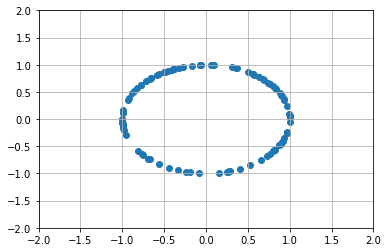

In [126]:

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', adjustable='box')

plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.scatter(samples[:,0],samples[:,1])
plt.grid()

plt.show()
# plt.savefig("uniform.png")
# plt.savefig("gaussian.png")
# plt.savefig("anisotrophy.png")

In [114]:
from numpy.linalg import norm
import tqdm

def cosine_similarity(samples1, samples2, n=3):
    """
    :param samples1: random selected samples
    :param samples2: random selected samples
    :param n: the most n dims contributing to cosine similarity
    :return: 1. cosine similarity; 2. most n dims; 3. their contributions
    """
    print("calculating Icos...")
    nsamples = min(len(samples1), len(samples2))
    contris, sims = [], []
    for emb1, emb2 in tqdm.tqdm(zip(samples1, samples2)):
        contris.append(np.multiply(emb1, emb2) / (norm(emb1) * norm(emb2)))
        sims.append(np.sum(contris[-1]))

    contris = np.mean(contris, axis=0) / np.mean(sims)

    return 1.0 * np.sum(sims) / nsamples, np.argsort(contris)[-n:], contris[np.argsort(contris)[-n:]]


In [155]:
nPairs = 1000000
samples1,samples2 = [],[]
# randomly choose <nPairs> samples from whole sample set
for i in range(nPairs):
  idx1,idx2 = randint(0,nSamples-1),randint(0,nSamples-1)
  samples1.append(samples[idx1,:])
  samples2.append(samples[idx2,:])

# If the embedding space is uni
samples1,samples2 = np.asarray(samples1), np.asarray(samples2)
Icos = cosine_similarity(samples1,samples2)[0]

print("Icos=", Icos)

calculating Icos...


1000000it [00:22, 44481.43it/s]


Icos= 0.0003120336902232905
